In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import keras

In [111]:
df = pd.read_csv('diabetes.csv')

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [112]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [65]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [66]:
X = pd.DataFrame(X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                             'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
y_test

44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64

In [78]:
from tensorflow.keras.utils import to_categorical

X_arr = np.array(X_train)
y_arr = to_categorical(np.array(y_train))

In [79]:
y_arr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Normalization, Dropout

In [131]:
from keras.layers import Normalization

In [83]:
model = Sequential()

model.add(Dense(units=500, input_dim=8)) 
model.add(Activation('tanh'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=50))
model.add(Activation('sigmoid'))
model.add(Dense(units=2)) 
model.add(Activation('softmax'))

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
history = model.fit(X_arr, y_arr, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.5939 - accuracy: 0.6721 - val_loss: 0.4990 - val_accuracy: 0.7724
Epoch 2/100
16/16 - 0s - loss: 0.4996 - accuracy: 0.7760 - val_loss: 0.4334 - val_accuracy: 0.8211
Epoch 3/100
16/16 - 0s - loss: 0.4737 - accuracy: 0.7719 - val_loss: 0.4225 - val_accuracy: 0.8293
Epoch 4/100
16/16 - 0s - loss: 0.4661 - accuracy: 0.7923 - val_loss: 0.4252 - val_accuracy: 0.7967
Epoch 5/100
16/16 - 0s - loss: 0.4601 - accuracy: 0.7760 - val_loss: 0.4239 - val_accuracy: 0.8049
Epoch 6/100
16/16 - 0s - loss: 0.4556 - accuracy: 0.7719 - val_loss: 0.4164 - val_accuracy: 0.8130
Epoch 7/100
16/16 - 0s - loss: 0.4495 - accuracy: 0.7841 - val_loss: 0.4147 - val_accuracy: 0.8211
Epoch 8/100
16/16 - 0s - loss: 0.4491 - accuracy: 0.7780 - val_loss: 0.4140 - val_accuracy: 0.8049
Epoch 9/100
16/16 - 0s - loss: 0.4451 - accuracy: 0.7902 - val_loss: 0.4299 - val_accuracy: 0.7967
Epoch 10/100
16/16 - 0s - loss: 0.4433 - accuracy: 0.7841 - val_loss: 0.4252 - val_accuracy: 0.8293
Epoch 11/

16/16 - 0s - loss: 0.2153 - accuracy: 0.9104 - val_loss: 0.4500 - val_accuracy: 0.8211
Epoch 84/100
16/16 - 0s - loss: 0.2088 - accuracy: 0.9165 - val_loss: 0.4782 - val_accuracy: 0.8049
Epoch 85/100
16/16 - 0s - loss: 0.2146 - accuracy: 0.9104 - val_loss: 0.4798 - val_accuracy: 0.8211
Epoch 86/100
16/16 - 0s - loss: 0.2061 - accuracy: 0.9246 - val_loss: 0.4874 - val_accuracy: 0.8130
Epoch 87/100
16/16 - 0s - loss: 0.2064 - accuracy: 0.9165 - val_loss: 0.4765 - val_accuracy: 0.8293
Epoch 88/100
16/16 - 0s - loss: 0.2136 - accuracy: 0.9165 - val_loss: 0.4908 - val_accuracy: 0.8049
Epoch 89/100
16/16 - 0s - loss: 0.2021 - accuracy: 0.9165 - val_loss: 0.4887 - val_accuracy: 0.8211
Epoch 90/100
16/16 - 0s - loss: 0.1932 - accuracy: 0.9308 - val_loss: 0.4884 - val_accuracy: 0.8049
Epoch 91/100
16/16 - 0s - loss: 0.1970 - accuracy: 0.9165 - val_loss: 0.4914 - val_accuracy: 0.8211
Epoch 92/100
16/16 - 0s - loss: 0.1879 - accuracy: 0.9348 - val_loss: 0.5059 - val_accuracy: 0.8211
Epoch 93/100


In [86]:
preds = model.predict(np.array(X_test))

In [87]:
preds

array([[7.06401188e-04, 9.99293566e-01],
       [9.68522966e-01, 3.14770751e-02],
       [8.22545230e-01, 1.77454844e-01],
       [9.48408723e-01, 5.15912622e-02],
       [9.99998927e-01, 1.10633107e-06],
       [7.60852322e-02, 9.23914731e-01],
       [3.64976287e-01, 6.35023713e-01],
       [2.19473659e-04, 9.99780595e-01],
       [9.99992728e-01, 7.23472567e-06],
       [6.27325997e-02, 9.37267423e-01],
       [8.24916601e-01, 1.75083473e-01],
       [1.10013694e-04, 9.99889970e-01],
       [9.99998212e-01, 1.80287236e-06],
       [9.99999762e-01, 2.91722557e-07],
       [5.39607167e-01, 4.60392833e-01],
       [5.46160638e-01, 4.53839362e-01],
       [9.68157500e-03, 9.90318418e-01],
       [9.99999642e-01, 3.16937331e-07],
       [3.07640366e-05, 9.99969244e-01],
       [9.91324902e-01, 8.67514964e-03],
       [4.88336533e-02, 9.51166332e-01],
       [1.44299096e-03, 9.98557031e-01],
       [8.95379484e-01, 1.04620486e-01],
       [8.21000431e-03, 9.91789937e-01],
       [9.997108

In [88]:
pred_classes = np.argmax(preds, axis=1)

In [89]:
pred_classes

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, pred_classes)

0.7337662337662337

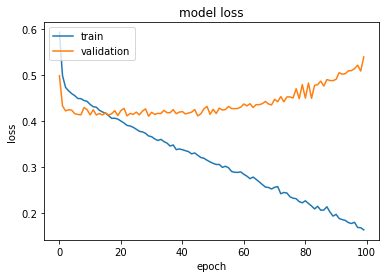

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

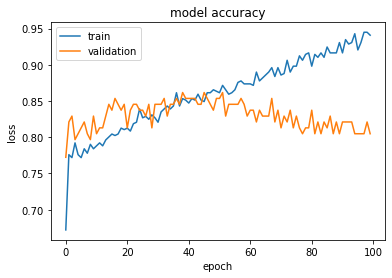

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [94]:
from keras.regularizers import l1, l2

In [95]:
inpt = np.array(X_train)
normalizer = Normalization(input_shape=[8,], axis=None)
normalizer.adapt(inpt)

In [96]:
def create_model(opt='adam',neurons=[500,100,50], act=['tanh','tanh','sigmoid']):
    model = Sequential([
        normalizer,
        Dense(neurons[0], activation=act[0], kernel_regularizer=l1(0.001)),
        Dropout(0.2, seed=100),
        Dense(neurons[1], activation=act[1], kernel_regularizer=l1(0.001)),
        Dropout(0.2, seed=100),
        Dense(neurons[2], activation=act[2], kernel_regularizer=l1(0.001)),
        Dropout(0.2, seed=100),
        Dense(2, activation='softmax')
    ])
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [99]:
model1 = create_model()

In [100]:
history1 = model1.fit(inpt, y_arr, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
16/16 - 1s - loss: 3.7890 - accuracy: 0.3788 - val_loss: 3.2435 - val_accuracy: 0.5772
Epoch 2/100
16/16 - 0s - loss: 2.9331 - accuracy: 0.6517 - val_loss: 2.4993 - val_accuracy: 0.7398
Epoch 3/100
16/16 - 0s - loss: 2.2703 - accuracy: 0.7597 - val_loss: 1.9156 - val_accuracy: 0.7967
Epoch 4/100
16/16 - 0s - loss: 1.7485 - accuracy: 0.7617 - val_loss: 1.4678 - val_accuracy: 0.7967
Epoch 5/100
16/16 - 0s - loss: 1.3671 - accuracy: 0.7637 - val_loss: 1.1432 - val_accuracy: 0.7967
Epoch 6/100
16/16 - 0s - loss: 1.0860 - accuracy: 0.7760 - val_loss: 0.9362 - val_accuracy: 0.8049
Epoch 7/100
16/16 - 0s - loss: 0.9300 - accuracy: 0.7699 - val_loss: 0.8274 - val_accuracy: 0.7967
Epoch 8/100
16/16 - 0s - loss: 0.8413 - accuracy: 0.7658 - val_loss: 0.7576 - val_accuracy: 0.8049
Epoch 9/100
16/16 - 0s - loss: 0.7915 - accuracy: 0.7841 - val_loss: 0.7039 - val_accuracy: 0.7967
Epoch 10/100
16/16 - 0s - loss: 0.7395 - accuracy: 0.7719 - val_loss: 0.6645 - val_accuracy: 0.8211
Epoch 11/

Epoch 84/100
16/16 - 0s - loss: 0.5658 - accuracy: 0.7699 - val_loss: 0.5001 - val_accuracy: 0.8211
Epoch 85/100
16/16 - 0s - loss: 0.5598 - accuracy: 0.7923 - val_loss: 0.4999 - val_accuracy: 0.8211
Epoch 86/100
16/16 - 0s - loss: 0.5545 - accuracy: 0.7658 - val_loss: 0.5000 - val_accuracy: 0.8130
Epoch 87/100
16/16 - 0s - loss: 0.5610 - accuracy: 0.7699 - val_loss: 0.4988 - val_accuracy: 0.8211
Epoch 88/100
16/16 - 0s - loss: 0.5659 - accuracy: 0.7882 - val_loss: 0.4977 - val_accuracy: 0.8211
Epoch 89/100
16/16 - 0s - loss: 0.5746 - accuracy: 0.7719 - val_loss: 0.4961 - val_accuracy: 0.8211
Epoch 90/100
16/16 - 0s - loss: 0.5466 - accuracy: 0.7780 - val_loss: 0.4969 - val_accuracy: 0.8211
Epoch 91/100
16/16 - 0s - loss: 0.5671 - accuracy: 0.7617 - val_loss: 0.4966 - val_accuracy: 0.8211
Epoch 92/100
16/16 - 0s - loss: 0.5589 - accuracy: 0.7800 - val_loss: 0.4961 - val_accuracy: 0.8211
Epoch 93/100
16/16 - 0s - loss: 0.5601 - accuracy: 0.7780 - val_loss: 0.4959 - val_accuracy: 0.8211


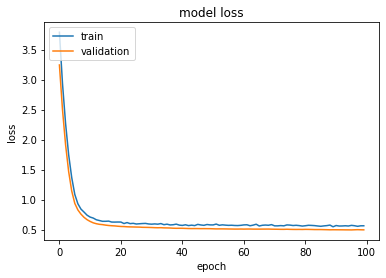

In [101]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

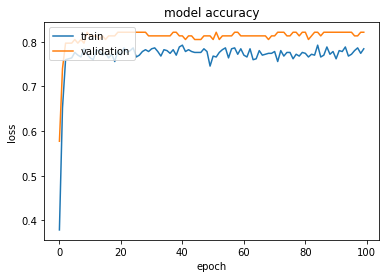

In [102]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

In [103]:
preds1 = model1.predict(np.array(X_test))

In [104]:
preds1

array([[0.27437708, 0.7256229 ],
       [0.9779781 , 0.02202195],
       [0.86867565, 0.13132435],
       [0.812948  , 0.18705198],
       [0.99228436, 0.0077157 ],
       [0.9364059 , 0.06359404],
       [0.5972179 , 0.402782  ],
       [0.07543898, 0.924561  ],
       [0.9831806 , 0.01681941],
       [0.13027622, 0.8697238 ],
       [0.9380264 , 0.06197357],
       [0.27636668, 0.72363335],
       [0.978725  , 0.02127498],
       [0.97692686, 0.02307314],
       [0.8641214 , 0.13587856],
       [0.77688915, 0.22311085],
       [0.18466589, 0.8153341 ],
       [0.98378974, 0.01621021],
       [0.13246816, 0.86753184],
       [0.9317238 , 0.06827629],
       [0.9717144 , 0.02828566],
       [0.14644434, 0.8535556 ],
       [0.9541031 , 0.04589685],
       [0.07451228, 0.92548776],
       [0.3589142 , 0.6410858 ],
       [0.99072075, 0.0092793 ],
       [0.27157515, 0.7284249 ],
       [0.9885954 , 0.01140461],
       [0.8031398 , 0.19686021],
       [0.989403  , 0.01059693],
       [0.

In [105]:
pred_classes_1 = np.argmax(preds1, axis=1)

In [106]:
accuracy_score(y_test, pred_classes_1)

0.7207792207792207

In [113]:
X_comp = np.array(X)
y_comp = to_categorical(np.array(y))

In [116]:
X_comp.shape

(768, 8)

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
from keras.wrappers.scikit_learn import KerasClassifier

In [126]:
model2 = KerasClassifier(build_fn=create_model, verbose=2, epochs=10)

In [125]:
param_grid = {'batch_size':[50,75],
             'opt':['sgd','adam'],
             'neurons':[[200,100,50],[150,75,30]],
              'act': [['tanh','tanh','sigmoid']]
             }

In [127]:
grid = GridSearchCV(estimator=model2, param_grid=param_grid)

In [128]:
grid_result = grid.fit(X_comp, y_comp)

Epoch 1/10
13/13 - 0s - loss: 2.7977 - accuracy: 0.4967
Epoch 2/10
13/13 - 0s - loss: 2.7578 - accuracy: 0.5945
Epoch 3/10
13/13 - 0s - loss: 2.7352 - accuracy: 0.6401
Epoch 4/10
13/13 - 0s - loss: 2.7252 - accuracy: 0.6433
Epoch 5/10
13/13 - 0s - loss: 2.7107 - accuracy: 0.6433
Epoch 6/10
13/13 - 0s - loss: 2.7021 - accuracy: 0.6547
Epoch 7/10
13/13 - 0s - loss: 2.7041 - accuracy: 0.6450
Epoch 8/10
13/13 - 0s - loss: 2.6932 - accuracy: 0.6498
Epoch 9/10
13/13 - 0s - loss: 2.6908 - accuracy: 0.6498
Epoch 10/10
13/13 - 0s - loss: 2.6832 - accuracy: 0.6515
4/4 - 0s - loss: 2.6669 - accuracy: 0.6494
Epoch 1/10
13/13 - 1s - loss: 2.7352 - accuracy: 0.6368
Epoch 2/10
13/13 - 0s - loss: 2.7098 - accuracy: 0.6547
Epoch 3/10
13/13 - 0s - loss: 2.6957 - accuracy: 0.6629
Epoch 4/10
13/13 - 0s - loss: 2.6917 - accuracy: 0.6678
Epoch 5/10
13/13 - 0s - loss: 2.6869 - accuracy: 0.6694
Epoch 6/10
13/13 - 0s - loss: 2.6808 - accuracy: 0.6678
Epoch 7/10
13/13 - 0s - loss: 2.6697 - accuracy: 0.6678
Epoc

Epoch 8/10
13/13 - 0s - loss: 1.9553 - accuracy: 0.6179
Epoch 9/10
13/13 - 0s - loss: 1.9454 - accuracy: 0.6244
Epoch 10/10
13/13 - 0s - loss: 1.9546 - accuracy: 0.6309
4/4 - 0s - loss: 1.8849 - accuracy: 0.7451
Epoch 1/10
13/13 - 1s - loss: 2.1206 - accuracy: 0.4699
Epoch 2/10
13/13 - 0s - loss: 2.0642 - accuracy: 0.5024
Epoch 3/10
13/13 - 0s - loss: 2.0229 - accuracy: 0.5626
Epoch 4/10
13/13 - 0s - loss: 1.9903 - accuracy: 0.6211
Epoch 5/10
13/13 - 0s - loss: 1.9736 - accuracy: 0.6358
Epoch 6/10
13/13 - 0s - loss: 1.9544 - accuracy: 0.6341
Epoch 7/10
13/13 - 0s - loss: 1.9499 - accuracy: 0.6537
Epoch 8/10
13/13 - 0s - loss: 1.9302 - accuracy: 0.6634
Epoch 9/10
13/13 - 0s - loss: 1.9220 - accuracy: 0.6472
Epoch 10/10
13/13 - 0s - loss: 1.9317 - accuracy: 0.6504
4/4 - 0s - loss: 1.9233 - accuracy: 0.6471
Epoch 1/10
13/13 - 1s - loss: 1.9633 - accuracy: 0.5831
Epoch 2/10
13/13 - 0s - loss: 1.8332 - accuracy: 0.6531
Epoch 3/10
13/13 - 0s - loss: 1.7469 - accuracy: 0.6515
Epoch 4/10
13/13

Epoch 6/10
9/9 - 0s - loss: 2.0585 - accuracy: 0.6531
Epoch 7/10
9/9 - 0s - loss: 1.9307 - accuracy: 0.6515
Epoch 8/10
9/9 - 0s - loss: 1.8123 - accuracy: 0.6564
Epoch 9/10
9/9 - 0s - loss: 1.6904 - accuracy: 0.6433
Epoch 10/10
9/9 - 0s - loss: 1.5949 - accuracy: 0.6596
3/3 - 0s - loss: 1.5296 - accuracy: 0.6299
Epoch 1/10
9/9 - 1s - loss: 2.6667 - accuracy: 0.6098
Epoch 2/10
9/9 - 0s - loss: 2.4939 - accuracy: 0.6293
Epoch 3/10
9/9 - 0s - loss: 2.3551 - accuracy: 0.6260
Epoch 4/10
9/9 - 0s - loss: 2.2155 - accuracy: 0.6244
Epoch 5/10
9/9 - 0s - loss: 2.0723 - accuracy: 0.6488
Epoch 6/10
9/9 - 0s - loss: 1.9549 - accuracy: 0.6602
Epoch 7/10
9/9 - 0s - loss: 1.8458 - accuracy: 0.6309
Epoch 8/10
9/9 - 0s - loss: 1.7364 - accuracy: 0.6569
Epoch 9/10
9/9 - 0s - loss: 1.6357 - accuracy: 0.6585
Epoch 10/10
9/9 - 0s - loss: 1.5308 - accuracy: 0.6780
3/3 - 0s - loss: 1.4127 - accuracy: 0.7516
Epoch 1/10
9/9 - 1s - loss: 2.7191 - accuracy: 0.6228
Epoch 2/10
9/9 - 0s - loss: 2.5437 - accuracy: 0

In [129]:
grid_result.best_params_

{'act': ['tanh', 'tanh', 'sigmoid'],
 'batch_size': 50,
 'neurons': [200, 100, 50],
 'opt': 'adam'}

In [130]:
grid_result.best_score_

0.6784398674964904

In [373]:
data = pd.read_csv('cars.csv')

data.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [374]:
data.shape

(963, 6)

In [401]:
X = data.copy()
y = X.pop('sales')

In [403]:
y.head()

0      620
1     1792
2    27754
3    28256
4     4438
Name: sales, dtype: int64

In [375]:
train = data.sample(frac=0.8, random_state=42)
test = data.drop(train.index)

In [376]:
train.head()

,age,gender,miles,debt,income,sales
529,32,0,23,54618,11548,26713
342,39,0,22,0,7769,1147
352,45,1,20,36043,11711,21566
819,52,1,18,9865,5563,7596
277,59,0,20,736,5216,12083


In [377]:
train_features = train.copy()
test_features = test.copy()

train_target = train_features.pop('sales')
test_target = test_features.pop('sales')

In [378]:
train_features.shape

(770, 5)

In [379]:
normalizer = Normalization(axis=-1)

In [380]:
normalizer.adapt(np.array(train_features))

In [381]:
print(np.array(train_features[:1]))
print(normalizer(np.array(train_features[:1])).numpy())

[[   32     0    23 54618 11548]]
[[-0.46581292 -1.0289915  -0.35179746  2.19803     1.6489389 ]]


In [382]:
import tensorflow as tf

In [410]:
def build_model(norm):
    model = Sequential([
        normalizer,
        Dense(250, activation='relu',kernel_regularizer=l2(0.001)),
        Dense(175, activation='relu',kernel_regularizer=l2(0.001)),
        Dense(50, activation='relu',kernel_regularizer=l2(0.001)),
        Dense(1, activation='linear')
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    
    return model

SyntaxError: invalid syntax (<ipython-input-410-5b12b5d8033c>, line 5)

In [396]:
model = build_model(normalizer)

In [397]:
history = model.fit(train_features, train_target, epochs=150, validation_split=0.20)

Epoch 1/150
20/20 [==============================] - 0s 8ms/step - loss: 6100.9932 - val_loss: 3787.5403
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 3557.1570 - val_loss: 3038.3564
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 3342.3633 - val_loss: 4673.1045
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 3000.3298 - val_loss: 3504.2966
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 3208.3635 - val_loss: 3612.7512
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 3652.4395 - val_loss: 5785.3540
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 4771.3472 - val_loss: 3512.1323
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 3200.9077 - val_loss: 2955.9961
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 2774.1272 - val_loss: 3000.8486
Epoch 10/150
20/20 [==============================] - 0

20/20 [==============================] - 0s 3ms/step - loss: 2100.7766 - val_loss: 2733.4238
Epoch 79/150
20/20 [==============================] - 0s 3ms/step - loss: 2046.3999 - val_loss: 2751.4585
Epoch 80/150
20/20 [==============================] - 0s 2ms/step - loss: 1998.3704 - val_loss: 2836.3943
Epoch 81/150
20/20 [==============================] - 0s 2ms/step - loss: 2066.0437 - val_loss: 2853.0430
Epoch 82/150
20/20 [==============================] - 0s 2ms/step - loss: 2035.5959 - val_loss: 2784.5247
Epoch 83/150
20/20 [==============================] - 0s 2ms/step - loss: 2147.9448 - val_loss: 2721.5132
Epoch 84/150
20/20 [==============================] - 0s 3ms/step - loss: 2047.3811 - val_loss: 3046.6411
Epoch 85/150
20/20 [==============================] - 0s 2ms/step - loss: 2461.5376 - val_loss: 3794.3271
Epoch 86/150
20/20 [==============================] - 0s 2ms/step - loss: 2201.9399 - val_loss: 2887.2446
Epoch 87/150
20/20 [==============================] - 0s 2m

In [398]:
preds = model.evaluate(test_features, test_target)

7/7 [==============================] - 0s 2ms/step - loss: 2378.5881


In [399]:
preds

2378.588134765625

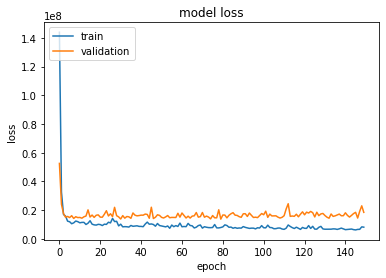

In [388]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')

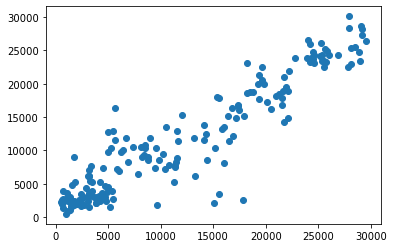

In [371]:
plt.scatter(test_target, model.predict(test_features))

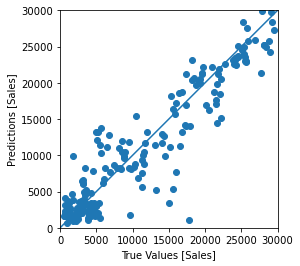

In [389]:
a = plt.axes(aspect='equal')
plt.scatter(test_target, model.predict(test_features))
plt.xlabel('True Values [Sales]')
plt.ylabel('Predictions [Sales]')
lims = [0, 30000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)

In [393]:
test_target.describe()

count      193.000000
mean     11699.927461
std       9100.503945
min        549.000000
25%       3510.000000
50%       8940.000000
75%      19629.000000
max      29494.000000
Name: sales, dtype: float64

In [400]:
(2378.588134765625 / 11699.927461)*100

20.329939161540114

In [394]:
((np.sqrt(11172550.0)) / 11699.927461)*100

28.56886483417827

In [411]:
def build_model(norm):
    model = Sequential([
        normalizer,
        Dense(250, activation='relu'),
        Dense(175, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    
    return model

In [412]:
history = model.fit(X, y, epochs=150, validation_split=0.20)

Epoch 1/150
25/25 [==============================] - 0s 3ms/step - loss: 2002.2467 - val_loss: 2395.8079
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 1803.5167 - val_loss: 2451.6599
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 2011.8411 - val_loss: 2508.3926
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 1885.7213 - val_loss: 2457.1272
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 1771.6738 - val_loss: 2504.6199
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 1862.0256 - val_loss: 2383.1633
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 1887.2462 - val_loss: 2425.9729
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 1792.5005 - val_loss: 2536.3625
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 1815.5609 - val_loss: 2574.2168
Epoch 10/150
25/25 [==============================] - 0

25/25 [==============================] - 0s 2ms/step - loss: 1830.8492 - val_loss: 2662.2837
Epoch 79/150
25/25 [==============================] - 0s 2ms/step - loss: 1788.2830 - val_loss: 2502.8430
Epoch 80/150
25/25 [==============================] - 0s 2ms/step - loss: 1674.4275 - val_loss: 2650.7358
Epoch 81/150
25/25 [==============================] - 0s 2ms/step - loss: 1827.9945 - val_loss: 2761.7117
Epoch 82/150
25/25 [==============================] - 0s 2ms/step - loss: 2133.1621 - val_loss: 2651.5637
Epoch 83/150
25/25 [==============================] - 0s 2ms/step - loss: 1733.5953 - val_loss: 2696.6038
Epoch 84/150
25/25 [==============================] - 0s 2ms/step - loss: 1712.8860 - val_loss: 2547.6223
Epoch 85/150
25/25 [==============================] - 0s 2ms/step - loss: 1751.9144 - val_loss: 2601.3511
Epoch 86/150
25/25 [==============================] - 0s 2ms/step - loss: 1662.9686 - val_loss: 2555.2197
Epoch 87/150
25/25 [==============================] - 0s 2m

In [413]:
preds = model.evaluate(X, y)

31/31 [==============================] - 0s 1ms/step - loss: 1850.2762


In [414]:
y.describe()

count      963.000000
mean     11689.860852
std       8986.896921
min        500.000000
25%       3554.000000
50%       9130.000000
75%      19245.000000
max      29926.000000
Name: sales, dtype: float64

In [ ]:
# Full Model: MAE/MeanSales

In [415]:
(preds/y.mean())*100

15.82804336699066

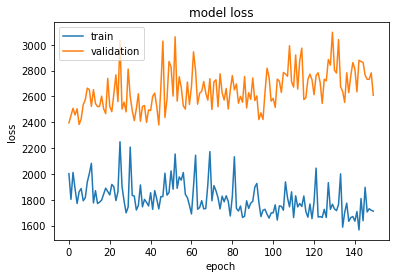

In [416]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')